## Packages

In [536]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [537]:
#import csv file using panda library
df = pd.read_csv("rain.csv")
df

,date,x
0,14-03-1905,23.56
1,15-03-1905,26.07
2,16-03-1905,21.86
3,17-03-1905,31.24
4,18-03-1905,23.65
...,...,...
95,17-06-1905,23.67
96,18-06-1905,26.75
97,19-06-1905,25.36
98,20-06-1905,24.79


In [538]:
#date type is float
df.date.describe()

count            100
unique           100
top       20-03-1905
freq               1
Name: date, dtype: object

In [539]:
#convert float date to the datetime
df.date = pd.to_datetime(df.date)

In [540]:
#set date columns to index 
df.set_index(df.date, inplace=True)

In [541]:
df

,date,x
date,,
1905-03-14,1905-03-14,23.56
1905-03-15,1905-03-15,26.07
1905-03-16,1905-03-16,21.86
1905-03-17,1905-03-17,31.24
1905-03-18,1905-03-18,23.65
...,...,...
1905-06-17,1905-06-17,23.67
1905-06-18,1905-06-18,26.75
1905-06-19,1905-06-19,25.36


# Set Frequency

In [485]:
#chake for null values in the dataset
#df=df.asfreq('d') d stand for daily
df.isna().sum()

date    0
x       0
dtype: int64

In [486]:
#Fill the null values with ffill f stand for forward fill.
df = df.fillna(method='ffill')

# ACF & PACF plot

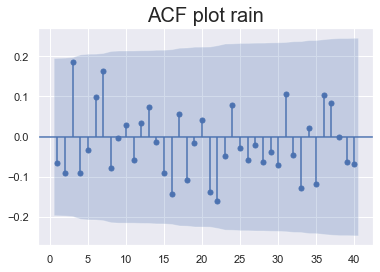

In [487]:
# ACF plot for MA
# There is seasonality in the dataset
sgt.plot_acf(df.x, lags=40, zero=False)
plt.title("ACF plot rain", size=20)
plt.show()

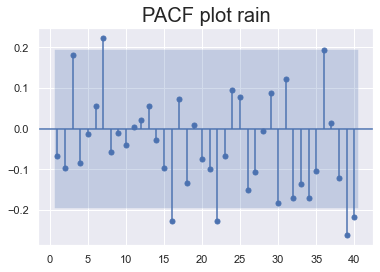

In [488]:
#PACF plot for AR
#The plot for cheak significat lag in the dataset there is 1 is the significat hag.
sgt.plot_pacf(df.x, lags=40, zero=False)
plt.title("PACF plot rain", size=20)
plt.show()

# AD fuller test

In [489]:
#cheak for the p value in the dataset.
#p value is less than 0.05 is for stationary in the dataset
#The 1%, 5% and 10% shows the 99, 95 and 90 percent confident respectively.
sts.adfuller(df.x)

(-10.501999604331562,
 1.0780005692902639e-18,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 503.3597515956342)

## Splitting the Data

In [553]:
#spliting the dataset into train and test.
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

In [380]:
#head functiom show top five value
df_test.head()

,date,x
date,,
1905-02-06,1905-02-06,19.80
1905-03-06,1905-03-06,27.94
1905-04-06,1905-04-06,21.47
1905-05-06,1905-05-06,23.52
1905-06-06,1905-06-06,22.86


In [381]:
#tail functiom show bottom five value
df_test.tail()

,date,x
date,,
1905-06-17,1905-06-17,23.67
1905-06-18,1905-06-18,26.75
1905-06-19,1905-06-19,25.36
1905-06-20,1905-06-20,24.79
1905-06-21,1905-06-21,27.88


In [464]:
#apply auto arima model in the dataset
#from model_auto we can decide the which model is suitable for the dataset.
model_auto = auto_arima(df.x)

In [465]:
#That give us AR, I and MA value in the dataset. the value of AR,I and MA is zero
model_auto

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [466]:
#this is the arima model summary. the p value is 0.000 this is less than 0.05 that is good for the dataset.
#the arima model value is 0 for all.
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                -285.245
Date:                Wed, 01 Feb 2023   AIC                            574.490
Time:                        12:47:41   BIC                            579.701
Sample:                             0   HQIC                           576.599
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.8239      0.467     53.106      0.000      23.908      25.740
sigma2        17.5847      2.583      6.807      0.000      12.522      22.648
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 7.88
Prob(Q):                              0.50   Prob(JB):                         0.02
Heteroskedasticity (H):               1.29   Skew:                             0.67
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX

In [561]:
# that define start and end date of the model
start_date = "1905-02-06"
end_date = "1905-06-22"

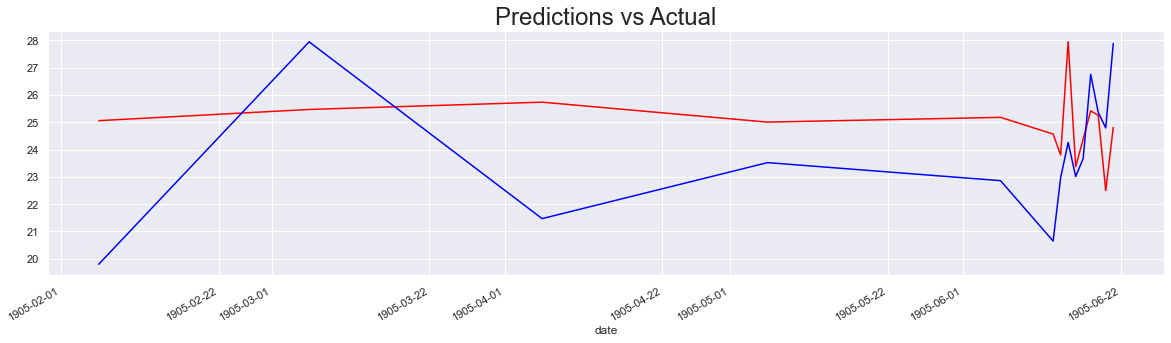

In [469]:
end_date = "1905-06-21"
model_ret_sarimax = SARIMAX(df.x[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.x[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Auto ARIMA

In [529]:
# Forecast for the next 10 pwriods.
pred = model_auto.predict(start=(len), n_period=10)
pd.DataFrame(pred, columns = ['prediction'])

,prediction
79,25.054177
80,25.054177
81,25.054177
82,25.054177
83,25.054177
84,25.054177
85,25.054177
86,25.054177
87,25.054177
88,25.054177


In [554]:
#apply for the model_auto
model_auto = auto_arima(df.x[1:], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [555]:
df_test.head()

,date,x
date,,
1905-02-06,1905-02-06,19.80
1905-03-06,1905-03-06,27.94
1905-04-06,1905-04-06,21.47
1905-05-06,1905-05-06,23.52
1905-06-06,1905-06-06,22.86


In [562]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            index = df_test[start_date:end_date].index))

AssertionError: <class 'numpy.ndarray'>

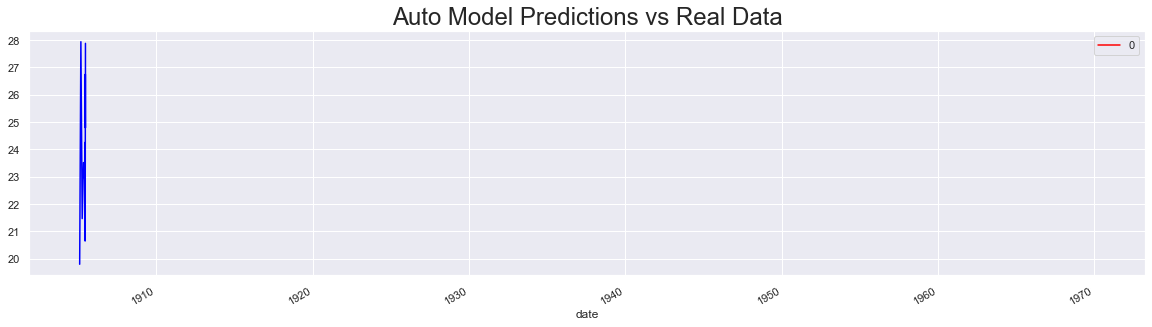

In [563]:
#This code show the actual vs predict model for the dataset.
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.x[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()